In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("housing.csv")

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
#we want to predict meadian housing value (our target variable)
#all the others are input features to predict median house value

#preprocessing and scaling

#check null value

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
data.dropna(inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

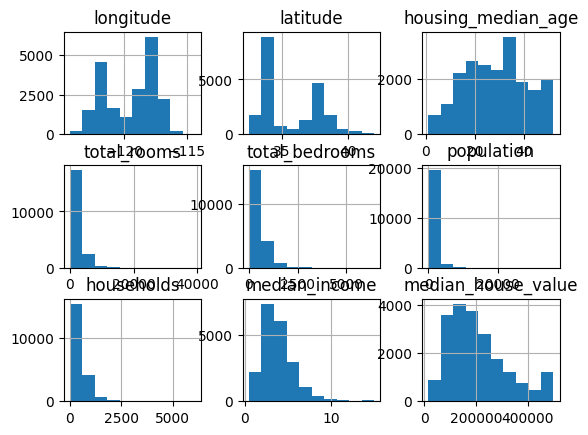

In [11]:
data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

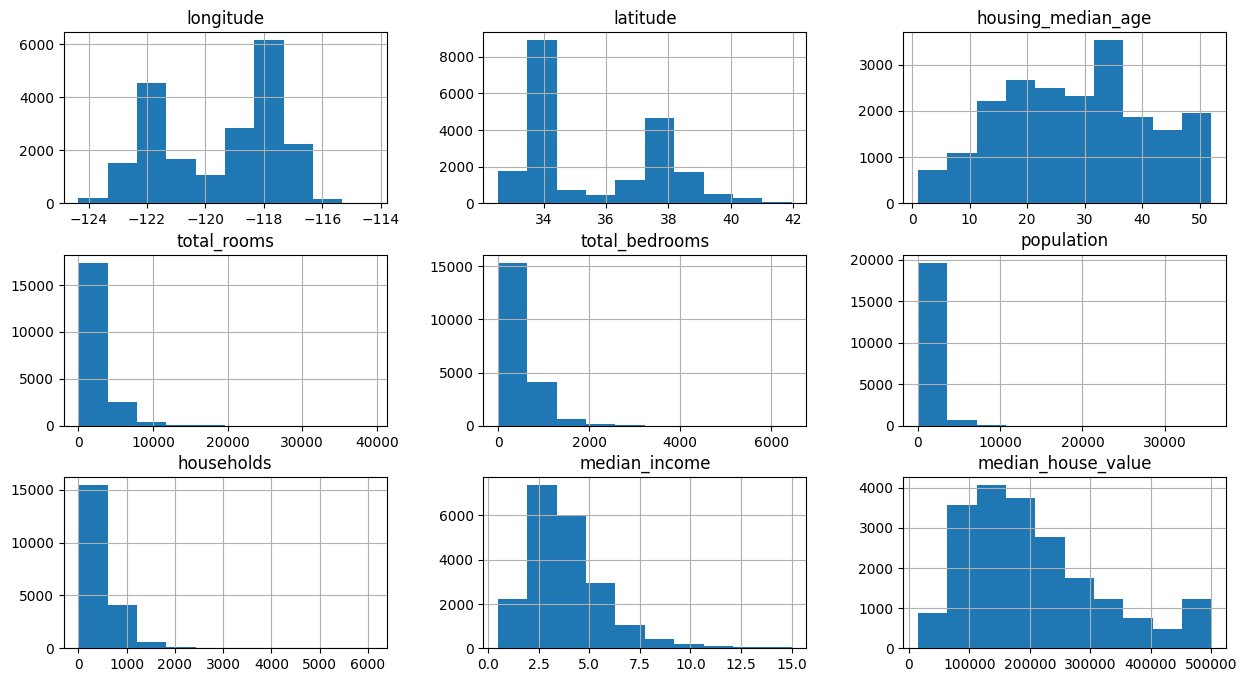

In [12]:
data.hist(figsize = (15, 8))

In [13]:
#to get a smooth graph log normal distribution
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_bedooms'}>, <Axes: >, <Axes: >]],
      dtype=object)

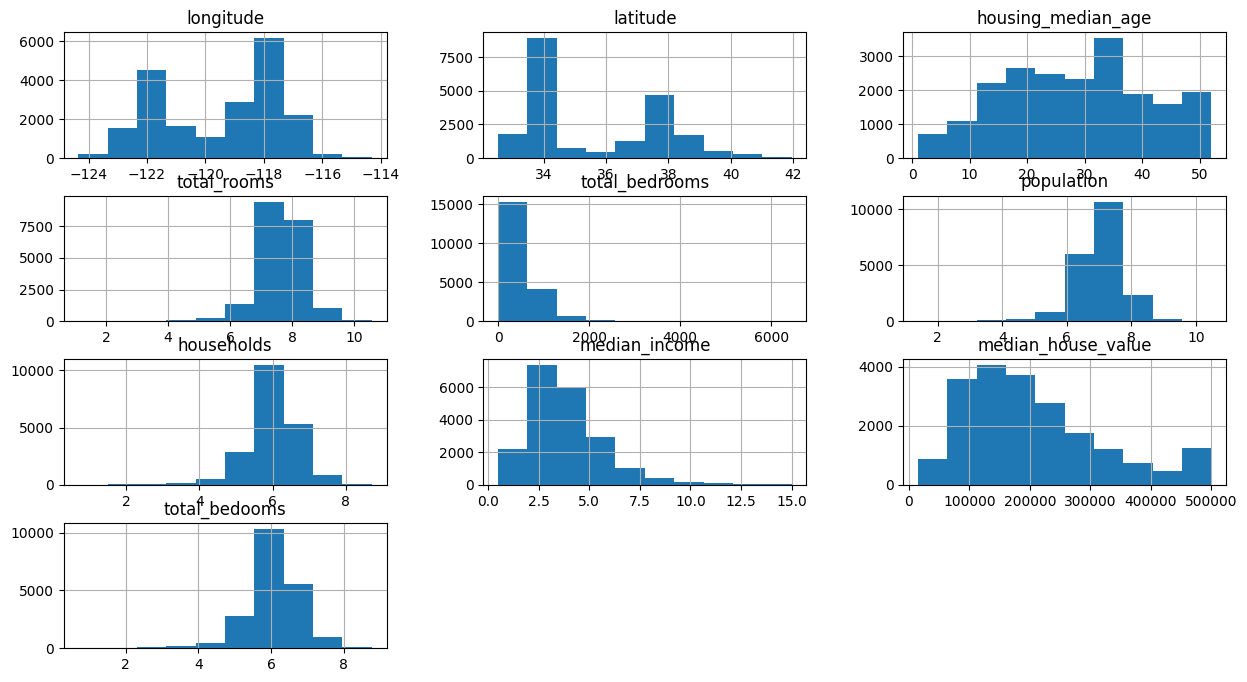

In [14]:
data.hist(figsize = (15, 8))

In [15]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [14]:
pd.get_dummies(data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [16]:
data.join(pd.get_dummies(data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,129.0,5.777652,4.844187,8.3252,452600.0,NEAR BAY,4.867534,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,1106.0,7.784057,7.037906,8.3014,358500.0,NEAR BAY,7.009409,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,190.0,6.208590,5.181784,7.2574,352100.0,NEAR BAY,5.252273,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,235.0,6.326149,5.393628,5.6431,341300.0,NEAR BAY,5.463832,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,280.0,6.338594,5.560682,3.8462,342200.0,NEAR BAY,5.638355,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,374.0,6.740519,5.802118,1.5603,78100.0,INLAND,5.926926,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,150.0,5.877736,4.744932,2.5568,77100.0,INLAND,5.017280,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,485.0,6.915723,6.073045,1.7000,92300.0,INLAND,6.186209,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,409.0,6.609349,5.857933,1.8672,84700.0,INLAND,6.016157,False,True,False,False,False


In [17]:
data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,129.0,5.777652,4.844187,8.3252,452600.0,4.867534,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,1106.0,7.784057,7.037906,8.3014,358500.0,7.009409,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,190.0,6.208590,5.181784,7.2574,352100.0,5.252273,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,235.0,6.326149,5.393628,5.6431,341300.0,5.463832,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,280.0,6.338594,5.560682,3.8462,342200.0,5.638355,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,374.0,6.740519,5.802118,1.5603,78100.0,5.926926,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,150.0,5.877736,4.744932,2.5568,77100.0,5.017280,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,485.0,6.915723,6.073045,1.7000,92300.0,6.186209,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,409.0,6.609349,5.857933,1.8672,84700.0,6.016157,False,True,False,False,False


In [18]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [19]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.069608,0.109259,0.055823,-0.015550,-0.045398,0.060817,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.066983,-0.136543,-0.088207,-0.079626,-0.144638,-0.068248,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.320451,-0.243011,-0.241630,-0.118278,0.106432,-0.272112,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.760280,0.864580,0.931700,0.205800,0.158506,0.945865,0.020809,-0.012862,-0.007567,-0.016499,0.002862
total_bedrooms,0.069608,-0.066983,-0.320451,0.760280,1.000000,0.723306,0.787492,-0.007723,0.049686,0.812971,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.109259,-0.136543,-0.243011,0.864580,0.723306,1.000000,0.932190,-0.004850,-0.021904,0.897523,0.115020,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.931700,0.787492,0.932190,1.000000,0.003918,0.072765,0.974593,0.072391,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.007723,-0.004850,0.003918,1.000000,0.688355,-0.025575,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.049686,-0.021904,0.072765,0.688355,1.000000,0.053311,0.257614,-0.484787,0.023525,0.160526,0.140378
total_bedooms,0.060817,-0.068248,-0.272112,0.945865,0.812971,0.897523,0.974593,-0.025575,0.053311,1.000000,0.041725,-0.044914,-0.001902,-0.016793,0.016429


<Axes: >

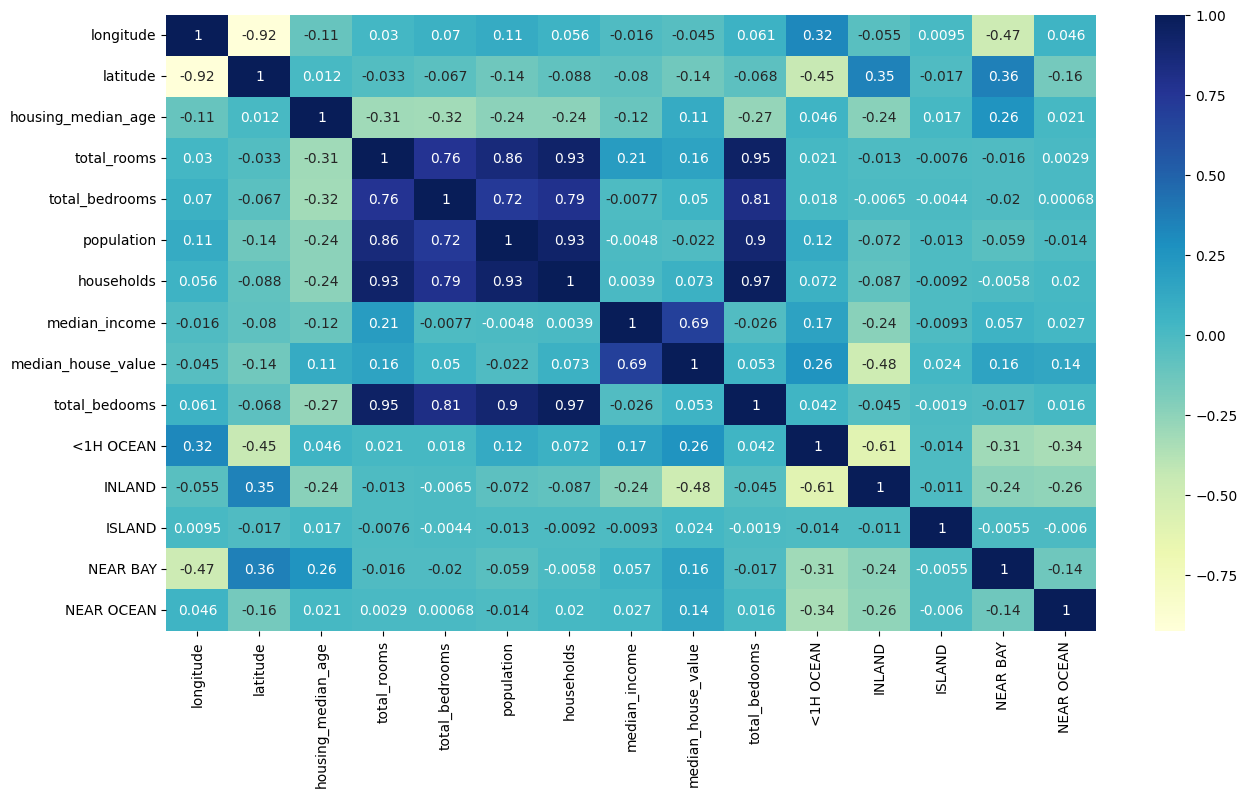

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

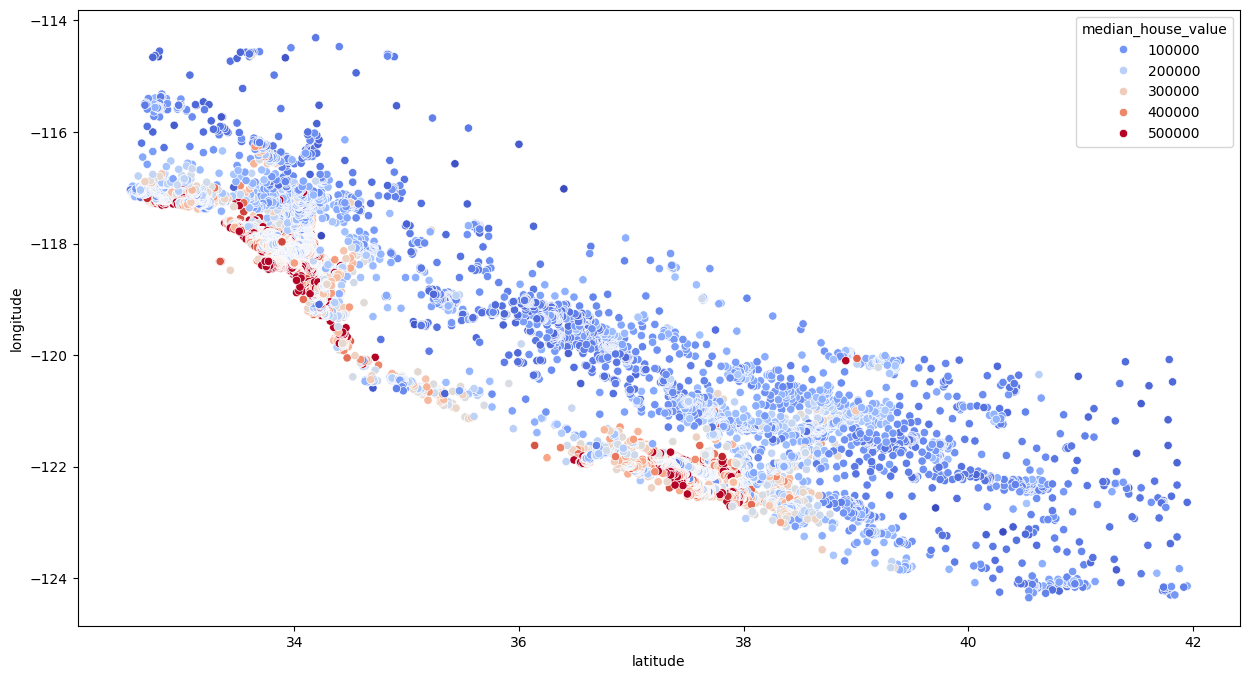

In [20]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x= "latitude", y = "longitude", data=data, hue="median_house_value", palette = "coolwarm")

In [21]:
#feature engineering
data['bedroom_ratio'] = data['total_bedrooms']/data['total_rooms']
data['household_rooms'] = data['total_rooms']/data['households']

<Axes: >

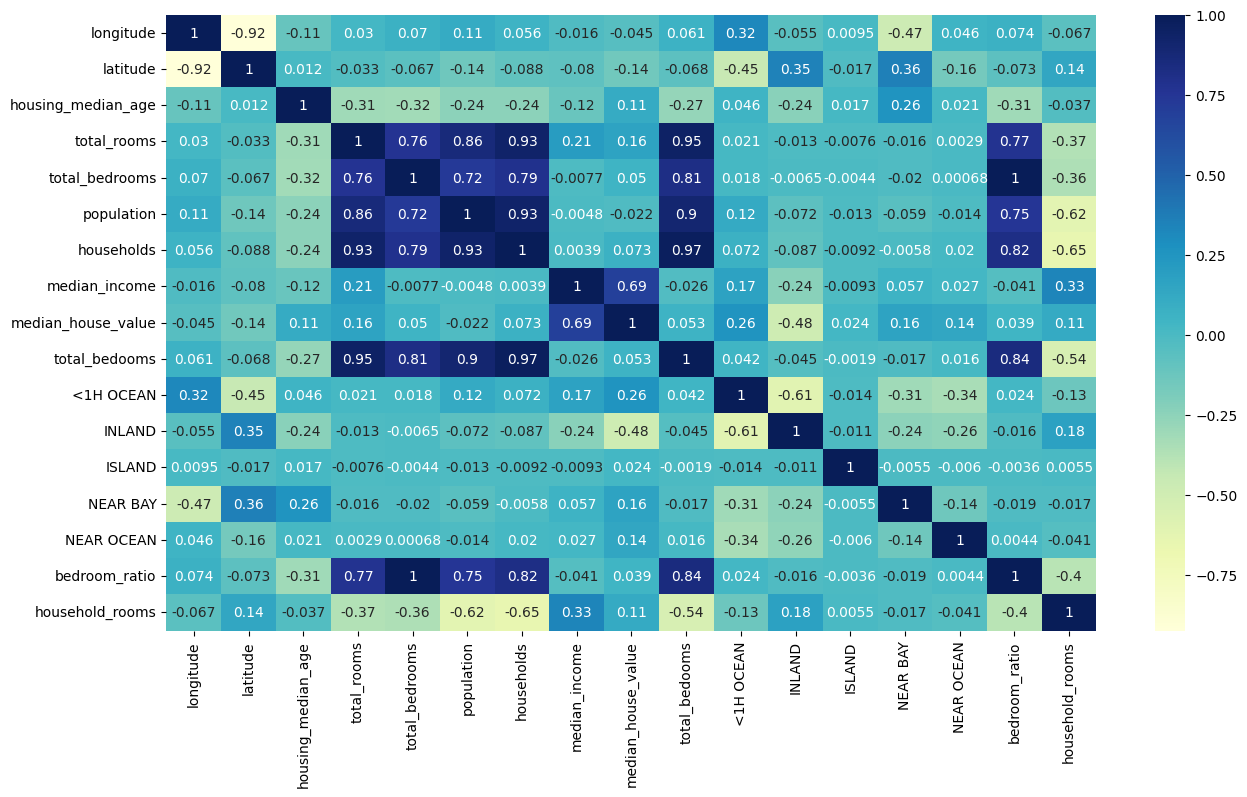

In [22]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [23]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [24]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,129.0,5.777652,4.844187,8.3252,4.867534,False,False,False,True,False,19.023581,1.399834
1,-122.22,37.86,21.0,8.867850,1106.0,7.784057,7.037906,8.3014,7.009409,False,False,False,True,False,124.720196,1.260013
2,-122.24,37.85,52.0,7.291656,190.0,6.208590,5.181784,7.2574,5.252273,False,False,False,True,False,26.057180,1.407171
3,-122.25,37.85,52.0,7.150701,235.0,6.326149,5.393628,5.6431,5.463832,False,False,False,True,False,32.863909,1.325768
4,-122.25,37.85,52.0,7.395108,280.0,6.338594,5.560682,3.8462,5.638355,False,False,False,True,False,37.862871,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,374.0,6.740519,5.802118,1.5603,5.926926,False,True,False,False,False,50.416673,1.278530
20636,-121.21,39.49,18.0,6.548219,150.0,5.877736,4.744932,2.5568,5.017280,False,True,False,False,False,22.906992,1.380045
20637,-121.22,39.43,17.0,7.720905,485.0,6.915723,6.073045,1.7000,6.186209,False,True,False,False,False,62.816468,1.271340
20638,-121.32,39.43,18.0,7.528869,409.0,6.609349,5.857933,1.8672,6.016157,False,True,False,False,False,54.324227,1.285243


In [25]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [26]:
#20% of testing 80% training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
3590,-118.46,34.24,11.0,8.587465,1160.0,7.931644,6.942157,3.8583,7.057037,True,False,False,False,False,135.080605,1.237003
679,-122.15,37.68,35.0,7.875879,447.0,7.207860,6.188264,4.3864,6.104793,False,False,False,True,False,56.755569,1.272712
13439,-117.42,34.09,28.0,8.069029,525.0,7.467942,6.261492,4.1375,6.265301,False,True,False,False,False,65.063588,1.288675
531,-122.26,37.78,52.0,6.952729,239.0,6.208590,5.379897,2.9213,5.480639,False,False,False,True,False,34.374993,1.292353
16786,-122.47,37.67,20.0,8.646466,992.0,8.230311,6.910751,5.5845,6.900731,False,False,False,False,True,114.728960,1.251162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,-118.43,34.02,41.0,7.784889,516.0,6.909753,6.244167,4.3906,6.248043,True,False,False,False,False,66.282253,1.246746
12771,-121.43,38.63,43.0,6.917706,225.0,6.405228,5.389072,1.6641,5.420535,False,True,False,False,False,32.525235,1.283654
15092,-116.93,32.81,18.0,7.803027,466.0,7.361375,6.159095,2.6429,6.146329,True,False,False,False,False,59.720416,1.266911
18585,-121.77,36.94,18.0,6.969791,341.0,6.941190,5.749393,2.0192,5.834811,True,False,False,False,False,48.925429,1.212265


In [28]:
y_train

3590     170700.0
679      205200.0
13439    128300.0
531      190800.0
16786    304300.0
           ...   
5421     500001.0
12771     67000.0
15092    125400.0
18585    171300.0
15255    278300.0
Name: median_house_value, Length: 16346, dtype: float64

In [29]:
train_data = x_train.join(y_train) #joining both x train and y train

In [30]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
3590,-118.46,34.24,11.0,8.587465,1160.0,7.931644,6.942157,3.8583,7.057037,True,False,False,False,False,135.080605,1.237003,170700.0
679,-122.15,37.68,35.0,7.875879,447.0,7.207860,6.188264,4.3864,6.104793,False,False,False,True,False,56.755569,1.272712,205200.0
13439,-117.42,34.09,28.0,8.069029,525.0,7.467942,6.261492,4.1375,6.265301,False,True,False,False,False,65.063588,1.288675,128300.0
531,-122.26,37.78,52.0,6.952729,239.0,6.208590,5.379897,2.9213,5.480639,False,False,False,True,False,34.374993,1.292353,190800.0
16786,-122.47,37.67,20.0,8.646466,992.0,8.230311,6.910751,5.5845,6.900731,False,False,False,False,True,114.728960,1.251162,304300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,-118.43,34.02,41.0,7.784889,516.0,6.909753,6.244167,4.3906,6.248043,True,False,False,False,False,66.282253,1.246746,500001.0
12771,-121.43,38.63,43.0,6.917706,225.0,6.405228,5.389072,1.6641,5.420535,False,True,False,False,False,32.525235,1.283654,67000.0
15092,-116.93,32.81,18.0,7.803027,466.0,7.361375,6.159095,2.6429,6.146329,True,False,False,False,False,59.720416,1.266911,125400.0
18585,-121.77,36.94,18.0,6.969791,341.0,6.941190,5.749393,2.0192,5.834811,True,False,False,False,False,48.925429,1.212265,171300.0


In [31]:
test_data = x_test.join(y_test)

In [32]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,total_bedooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
16335,-121.35,38.04,5.0,8.367300,613.0,7.699389,6.432940,5.5842,6.419995,False,True,False,False,False,73.261386,1.300696,159100.0
11442,-117.98,33.72,24.0,7.946971,547.0,7.461066,6.304449,6.0494,6.306275,True,False,False,False,False,68.831253,1.260534,240400.0
18758,-122.36,40.66,17.0,7.932721,559.0,7.332369,6.249975,2.0119,6.327937,False,True,False,False,False,70.467624,1.269240,75800.0
9725,-121.71,36.88,19.0,7.835579,554.0,7.754910,6.200509,3.7766,6.318968,True,False,False,False,False,70.703133,1.263699,177000.0
16346,-121.34,38.03,12.0,7.903966,433.0,7.090910,5.942799,4.9861,6.073045,False,True,False,False,False,54.782627,1.330007,133500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,-119.55,36.51,46.0,7.544332,390.0,6.879356,6.001415,2.2132,5.968708,False,True,False,False,False,51.694437,1.257092,76600.0
9352,-122.57,37.96,52.0,8.148735,468.0,7.279319,6.156979,9.1834,6.150603,False,False,False,True,False,57.432229,1.323496,500001.0
10979,-117.85,33.77,23.0,8.687611,1204.0,8.180601,7.048386,4.0398,7.094235,True,False,False,False,False,138.588160,1.232567,233100.0
3732,-118.41,34.18,30.0,7.605392,513.0,6.959399,6.208590,3.0119,6.242223,True,False,False,False,False,67.452141,1.224979,262200.0


In [33]:
#simple linear regression model
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

#simple linear regression model for TESTING
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [34]:
reg.score(x_test, y_test)

0.6603668909661804

In [35]:
#simple linear regression model and SCALING
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s,y_train)


LinearRegression()

In [36]:
#42 again the 2nd tab
x_test_s = scaler.transform(x_test)

In [37]:
reg.score(x_test_s, y_test) #scaled value down

0.6603668909661804

In [ ]:
#RANDOM FOREST WITH HYPER PARAMETER TUNING

In [38]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
RandomForestRegressor()

RandomForestRegressor()

In [40]:
forest.score(x_test,y_test)

0.8187434785525745

In [41]:
 #scaling

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [42]:
forest.score(x_test_s, y_test)

0.8175651080476358

In [52]:
#We will be able to get it higher by using parameter grid and for that we will use grid search and cross validation
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[3, 10, 30],
    "max_features":[2, 4, 6, 8],
    
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score = True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
#this is going t give us the opmtimal model
#we are going to get the best estimator which we can use to score the regressor against the test data to see how it performs
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30)

In [54]:
best_forest = grid_search.best_estimator_

In [55]:
best_forest.score(x_test_s, y_test)

0.8179686949116891

In [43]:
#performance did not improve, so we will try this now

#As 30 is the optimal solution, we will start with 30
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators":[30, 50, 100],
    "max_features":[8, 12, 20],
    "min_samples_split":[2, 4, 6, 8]
    
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score = True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest.score(x_test_s, y_test)